In [68]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [70]:
df = pd.read_csv(r"C:\Users\Manish Tailor\Downloads\diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [72]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [74]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [76]:
# 3. check the the dattypes of each column
data_types = df.dtypes
print("\nData types of each column:\n", data_types)


Data types of each column:
 carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [78]:
# Creating the 'volume' feature by multiplying 'x', 'y', and 'z' columns
df['volume'] = df['x'] * df['y'] * df['z']

In [80]:
df.drop(columns=['x', 'y', 'z'], inplace=True)
df

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


In [82]:
# Dropping rows with missing values (if any)
df = df.dropna(subset=['volume'])

In [84]:
# Outlier removal using IQR method for multiple columns together
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Removing outliers from both columns together
df_no_outliers = remove_outliers(df, ['price', 'carat'])

# Checking the shape after outlier removal
print("\nAfter removing outliers, the data shape is:", df_no_outliers.shape)

# Checking and removing duplicates only once after all cleaning
duplicate_rows = df_no_outliers.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Removing duplicates
df_cleaned = df_no_outliers.drop_duplicates()

# Final shape after outlier and duplicate removal
print(f"Shape after removing duplicates: {df_cleaned.shape}")



After removing outliers, the data shape is: (50119, 8)
Number of duplicate rows: 127
Shape after removing duplicates: (49992, 8)


In [86]:
# Categorical columns ko Label Encode karna
le_clarity = LabelEncoder()
le_color = LabelEncoder()
le_cut = LabelEncoder()
df_cleaned = df_no_outliers.drop_duplicates().copy()
df_cleaned['clarity'] = le_clarity.fit_transform(df_cleaned['clarity'])
df_cleaned['color'] = le_color.fit_transform(df_cleaned['color'])
df_cleaned['cut'] = le_cut.fit_transform(df_cleaned['cut'])

In [88]:
X = df_cleaned[['carat', 'cut', 'clarity', 'color', 'volume']]  # Features
y = df_cleaned['price']  # Target Variable
  # Target Variable
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)  # X features ko scale karna

In [90]:
X

,carat,cut,clarity,color,volume
0,0.23,2,3,1,38.202030
1,0.21,3,2,1,34.505856
2,0.23,1,4,1,38.076885
3,0.29,3,5,5,46.724580
4,0.31,1,3,6,51.917250
...,...,...,...,...,...
53935,0.72,2,2,0,115.920000
53936,0.72,1,2,0,118.110175
53937,0.70,4,2,0,114.449728
53938,0.86,3,3,4,140.766120


In [92]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 49992, dtype: int64

In [94]:
#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(degree=2)
#X_poly = poly.fit_transform(X_scaled)

In [96]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train

,carat,cut,clarity,color,volume
22498,1.56,2,2,4,258.430260
32965,0.32,3,2,4,52.300704
45021,0.54,3,4,4,88.533440
27938,0.31,4,3,6,51.917250
45484,0.53,2,4,4,87.739526
...,...,...,...,...,...
11311,1.00,3,5,4,164.854032
48676,0.56,2,7,3,93.530840
42091,0.70,0,0,1,113.443737
860,0.90,3,2,6,141.202098


In [100]:
X_test

,carat,cut,clarity,color,volume
47624,0.55,3,5,1,90.325692
38601,0.40,2,5,1,64.448280
20884,1.29,4,4,3,213.333928
6721,0.30,2,7,4,49.799330
20377,0.31,2,5,2,50.828344
...,...,...,...,...,...
29790,0.30,2,2,0,49.898920
17578,1.06,4,5,1,171.608400
39476,0.41,2,4,1,67.260000
37026,0.33,2,7,3,53.626092


In [102]:
y_train

22498    10536
32965      461
45021     1637
27938      430
45484     1678
         ...  
11311     4984
48676     2004
42091     1273
860       2871
15851     6342
Name: price, Length: 39993, dtype: int64

In [104]:
y_test

47624    1881
38601    1038
20884    9105
6721      577
20377     625
         ... 
29790     709
17578    7079
39476    1079
37026     965
20636    8929
Name: price, Length: 9999, dtype: int64

In [106]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [108]:
y_pred

array([1951.95166667,  930.6125    , 9241.52166667, ..., 1150.2115    ,
        746.955     , 9450.868     ])

In [58]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 231.65946273372202


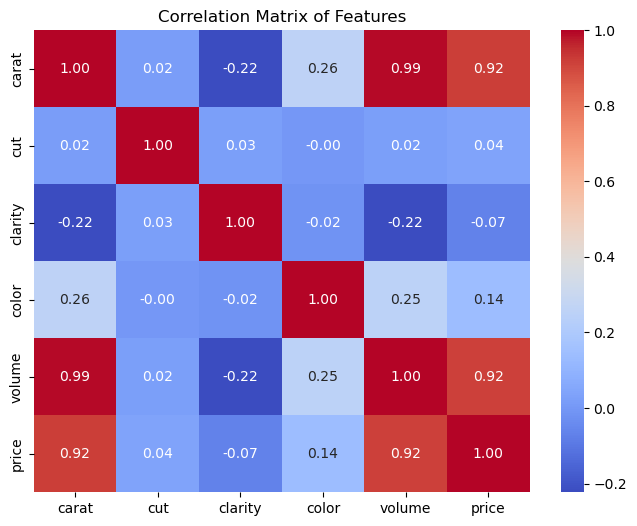

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a correlation matrix
corr_matrix = df_cleaned[['carat', 'cut', 'clarity', 'color', 'volume', 'price']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


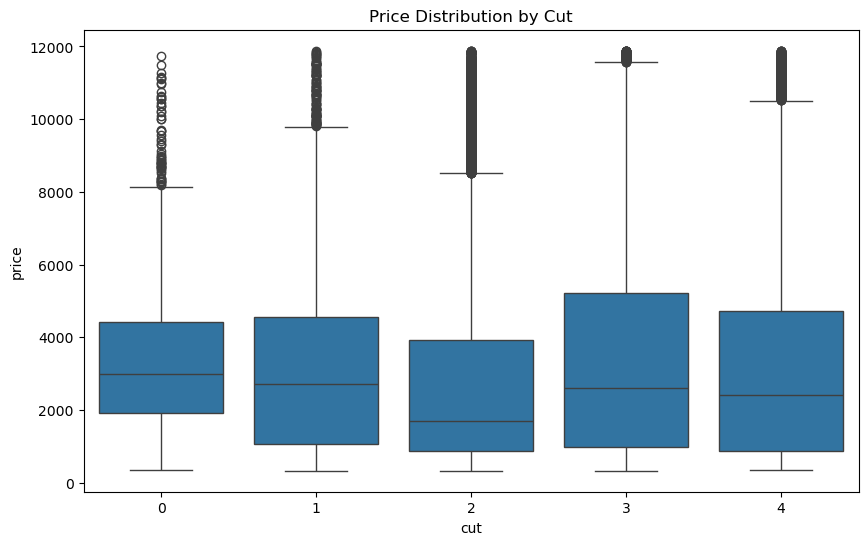

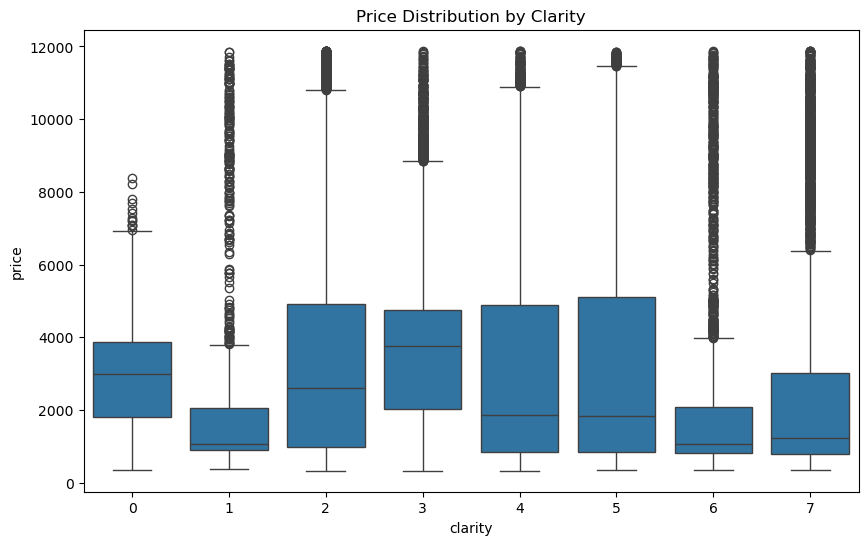

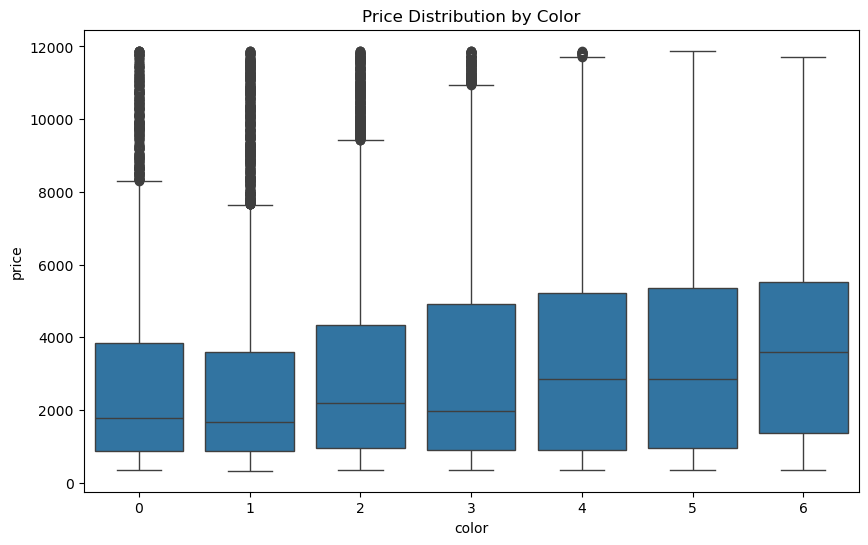

In [118]:
# Boxplot to see the price distribution based on categorical features
plt.figure(figsize=(10,6))

# Boxplot for 'cut'
sns.boxplot(x='cut', y='price', data=df_cleaned)
plt.title('Price Distribution by Cut')
plt.show()

# Boxplot for 'clarity'
plt.figure(figsize=(10,6))
sns.boxplot(x='clarity', y='price', data=df_cleaned)
plt.title('Price Distribution by Clarity')
plt.show()

# Boxplot for 'color'
plt.figure(figsize=(10,6))
sns.boxplot(x='color', y='price', data=df_cleaned)
plt.title('Price Distribution by Color')
plt.show()

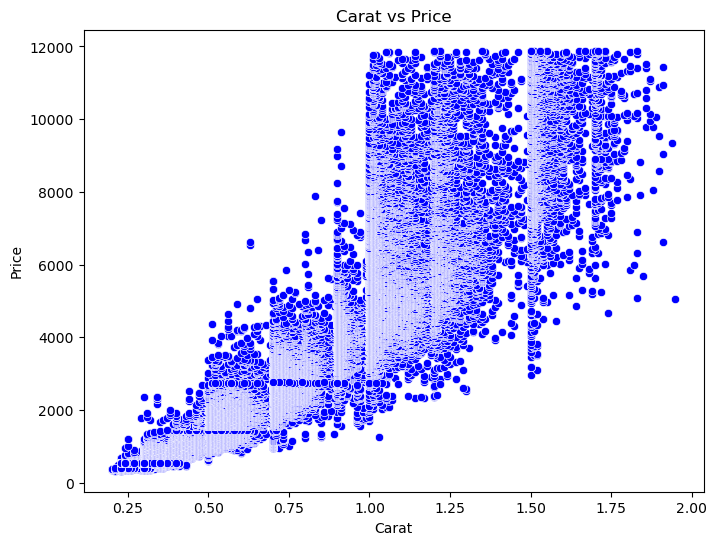

In [120]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='carat', y='price', data=df_cleaned, color='blue')
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

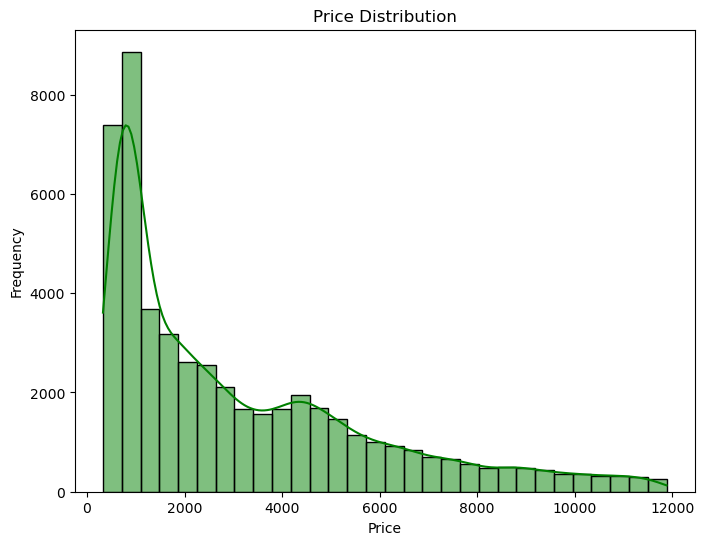

In [122]:
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['price'], bins=30, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [124]:
import os
print(os.getcwd())  # Current working directory

C:\Users\Manish Tailor
